#  Downloading Additional Files

In [12]:
print("Downloading Example Data")
import os
import requests
from tqdm import tqdm  # Progress bar for large files

# Define file URLs (modified for direct download)
files = {
    "Comparing_min_1.rhs": "https://livejohnshopkins-my.sharepoint.com/personal/schoi84_jh_edu/_layouts/15/download.aspx?share=EVTWvyqK4xhKsY5qB5Qyh_8BxxgBxHvGOWIukrll2kqsNA",
    "Comparing_min_2.rhs": "https://livejohnshopkins-my.sharepoint.com/personal/schoi84_jh_edu/_layouts/15/download.aspx?share=Eb6qow3n7DhPqFLX58JoQDoBn4r3-3mK4CjJ8wNE8k873A"
}

# Destination folder
destination_folder = "../ExampleData/"
os.makedirs(destination_folder, exist_ok=True)

# Function to download a file with a progress bar
def download_file(file_name, url):
    file_path = os.path.join(destination_folder, file_name)
    
    if os.path.exists(file_path):
        print(f"File already exists: {file_path}")
        return

    print(f"Downloading {file_name} to {file_path}...")
    
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        total_size = int(response.headers.get("content-length", 0))
        with open(file_path, "wb") as file, tqdm(
            desc=file_name,
            total=total_size,
            unit="B",
            unit_scale=True,
            unit_divisor=1024,
        ) as bar:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)
                bar.update(len(chunk))
        print("Download complete!")
    else:
        print(f"Error downloading {file_name}. Check your link.")

# Download all files
for file_name, url in files.items():
    download_file(file_name, url)


File already exists: ../ExampleData/Comparing_min_1.rhs
File already exists: ../ExampleData/Comparing_min_2.rhs


# **Preprocessing and Data Filtering**

- **Load and preprocess** the data for analysis.
- **Prepare necessary filters** to remove inference or noise.

In [2]:
import sys
import os
%matplotlib inline
# Add necessary paths
sys.path.append(os.path.abspath("../"))
from electrophysiology_mapping import preprocessing
from electrophysiology_mapping.spike import *


Reading Intan Technologies RHS Data File, Version 3.3

Found 17 amplifier channels.
Found 0 board ADC channels.
Found 0 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
numsamples and numblocks
1800064
14063
FINISHED HEADER

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 2.6 seconds

Reading Intan Technologies RHS Data File, Version 3.3

Found 17 amplifier channels.
Found 0 board ADC channels.
Found 0 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
numsamples and numblocks
1800064
14063
FINISHED HEADER

Allocating memory for data...
Reading data from fi

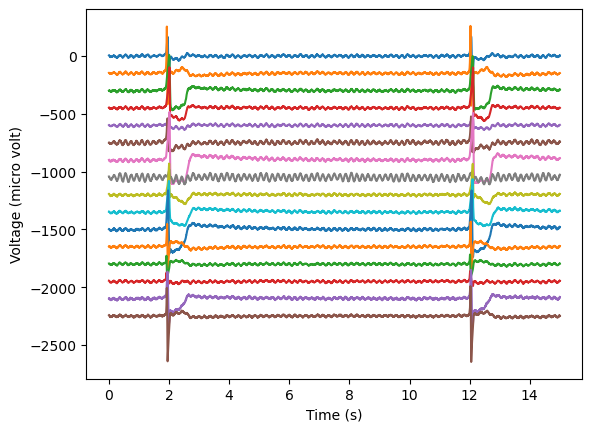

In [3]:
%matplotlib inline
sampling_rate = 10000

cutoff_frequency = 1000


data_path = "..\ExampleData\Comparing_min_1.rhs"
data_path_2 = "..\ExampleData\Comparing_min_2.rhs"

processed_data = preprocessing.processingPipline(data_path, data_path, cutoff=cutoff_frequency,fs_new= sampling_rate)
available_data = processed_data
target_indeces = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
target_data = available_data[target_indeces]
target_data_copy = target_data.copy()
preprocessing.plotWaves(available_data, target_indeces, start= 30000, sample= 15000)

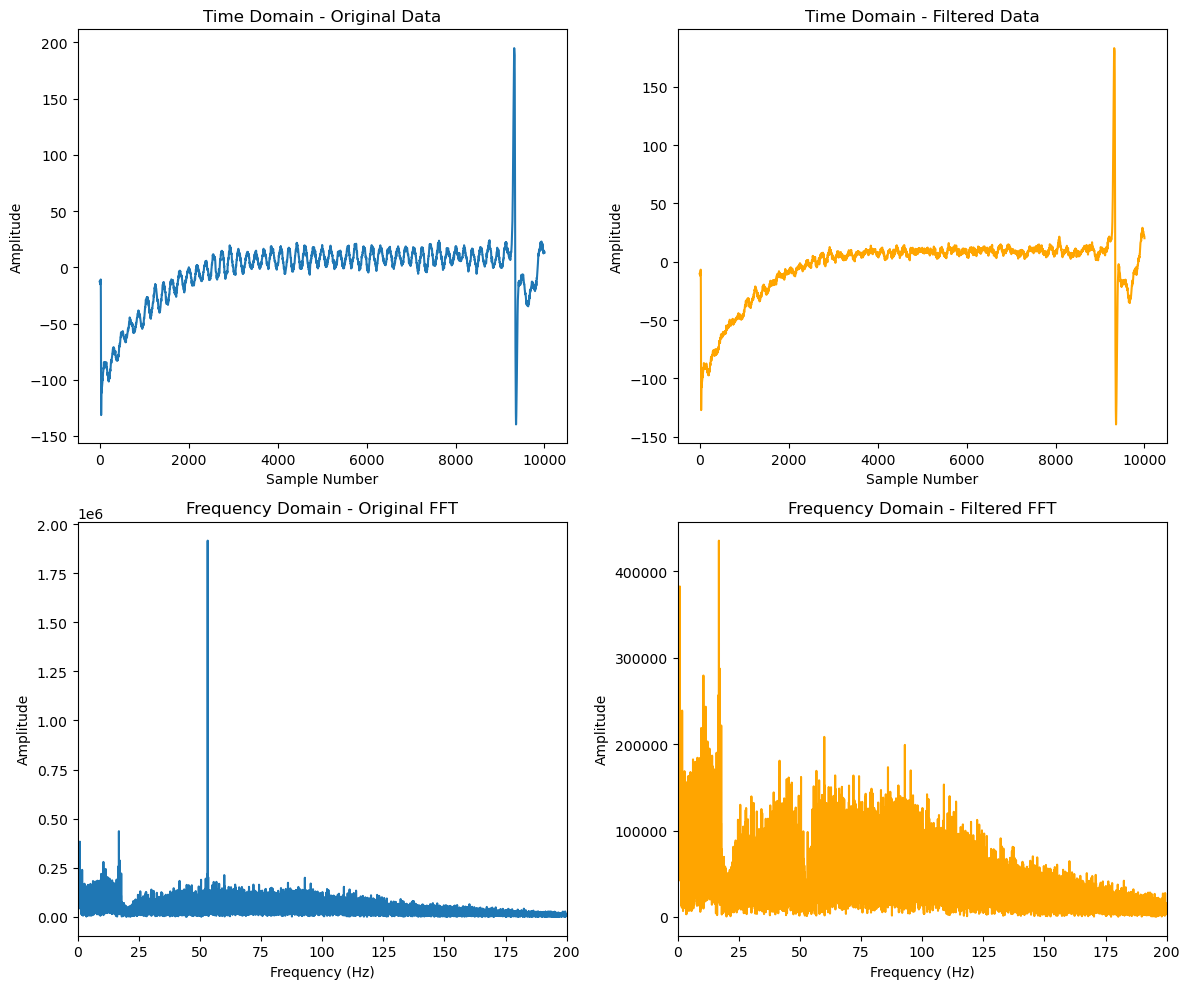

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


prepare_filter = True
fs = sampling_rate  # Sampling rate in Hz
lowcut = 16  # Low cut frequency in Hz
highcut = 17  # High cut frequency in Hz
lowcut_2 = 52
highcut_2 = 54
lowcut_3 = 59
highcut_3 = 61
%matplotlib inline
if (prepare_filter):
    channel = target_data_copy[:,60*fs:120*fs][0]

    # Sampling rate and filter parameters



    # Create the bandstop filter
    b, a = butter(N=1, Wn=[lowcut, highcut], btype='bandstop', fs=fs)

    b_2, a_2 = butter(N=1, Wn=[lowcut_2, highcut_2], btype='bandstop', fs=fs)

    b_3, a_3 = butter(N=1, Wn=[lowcut_3, highcut_3], btype='bandstop', fs=fs)
    # Apply the filter
    filtered_data = filtfilt(b_2,a_2, channel)

    # Compute the FFT of the original and filtered data
    frequencies = np.fft.rfftfreq(channel.size, d=1./fs)
    original_fft = np.abs(np.fft.rfft(channel))
    filtered_fft = np.abs(np.fft.rfft(filtered_data))

    # Plotting
    plt.figure(figsize=(12, 10))

    # Time domain - original data
    plt.subplot(2, 2, 1)
    plt.plot(channel[:fs], label='Original Data')
    plt.title('Time Domain - Original Data')
    plt.xlabel('Sample Number')
    plt.ylabel('Amplitude')

    # Time domain - filtered data
    plt.subplot(2, 2, 2)
    plt.plot(filtered_data[:fs], label='Filtered Data', color='orange')
    plt.title('Time Domain - Filtered Data')
    plt.xlabel('Sample Number')
    plt.ylabel('Amplitude')

    # Frequency domain - original FFT
    plt.subplot(2, 2, 3)
    plt.plot(frequencies, original_fft, label='Original FFT')
    plt.xlim([0,200])
    plt.title('Frequency Domain - Original FFT')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    #plt.xlim(0, fs/2)

    # Frequency domain - filtered FFT
    plt.subplot(2, 2, 4)
    plt.plot(frequencies, filtered_fft, label='Filtered FFT', color='orange')
    plt.xlim([0,200])
    plt.title('Frequency Domain - Filtered FFT')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    #plt.xlim(0, fs/2)

    plt.tight_layout()
    plt.show()


# Peak Detection and Slope Analysis

## Peak Storage
1. Initial peaks from NEO detector:
```python
bpm_over_time, peaks_neo = process_electrodes(data, sampling_rate)
```

2. Reference-based peaks:
```python
peaks = find_peak_based_on_reference_channel(data, ref_idx, direction)
peaks_save = peaks.copy()  # Stored for later comparison
```

## Slope Detection
Largest slopes stored in two formats:

1. Raw slopes:
```python
largest_slop = find_activation_slope(data, ref_idx, 
                                   peak_range=(0,250), 
                                   reference_peak=peaks_neo[1][1:])
```

2. Latency calculations:
```python
latency = np.mean(largest_slop - np.min(largest_slop, axis=0), axis=1)
latency_peak = np.mean(peaks_save - np.min(peaks_save, axis=0), axis=1)
```

## Core Functions

### NEO Peak Detection
$$\text{NEO}[x(n)] = x^2(n) - x(n-1)x(n+1)$$
Threshold: $T = \mu_{neo} \cdot t_1 + t_2 \cdot \sigma_{neo}$

### Activation Slope
For each peak window:
$$s_{max} = \max\left(\frac{d}{dt}x(t)\right)$$
where:
- $p$: peak location
- $r$: peak range
- $x(t)$: signal at time $t$

In [5]:

direction = np.zeros((target_data.shape[0],1))+1
#direction[1] = 1
%matplotlib inline

bpm_over_time, peaks_neo = process_electrodes(target_data[:,60*sampling_rate:120*sampling_rate], sampling_rate, threshold_val=[1,12])
print(len(peaks_neo[1]))
peaks = find_peak_based_on_reference_channel(target_data[:,60*sampling_rate:120*sampling_rate],3,direction, 
                                        peak_range= (int(15*sampling_rate/1000),int(15*sampling_rate/1000)), sd = 2, multi= -1,reference_peak=peaks_neo[0])
print(peaks.shape)
largest_slop = find_activation_slope(target_data[:,60*sampling_rate:120*sampling_rate],3,
                                        peak_range= (int(15*sampling_rate/1000),int(15*sampling_rate/1000)), sd = 2, multi= -1,
                                        reference_peak=peaks_neo[1][1:]) #list(peaks[0][1:-1]))# peaks_neo[1][1:])


latency = np.mean(largest_slop - np.min(largest_slop, axis=0), axis= 1)
peaks = largest_slop
filtered_data = target_data[:,60*sampling_rate:120*sampling_rate]
#peaks = peaks_neo
for i in range(target_data.shape[0]):    
    # filtered_data[i] = filtfilt(b, a, target_data[i,60000:120000])
    if i in [4,7]: # removing frequency dependent artifact in these channels
        filtered_data[i] = filtfilt(b, a, target_data[i,60*sampling_rate:120*sampling_rate])
        filtered_data[i] = filtfilt(b_2, a_2,filtered_data[i])
        filtered_data[i] = filtfilt(b_3, a_3,filtered_data[i])
        filtered_data[i] = target_data_copy[i,60*sampling_rate:120*sampling_rate]
        largest_slop[i] = find_activation_slope(filtered_data,3,
                                    peak_range= (0,250), sd = 2, multi= -1,reference_peak=peaks_neo[1][1:])[i] #list(peaks[0][1:-1]))# peaks_neo[1][1:])
        peaks[i] = largest_slop[i]
    else:
        filtered_data[i] = filtfilt(b_2, a_2, target_data[i,60*sampling_rate:120*sampling_rate])
        filtered_data[i] = target_data_copy[i,60*sampling_rate:120*sampling_rate]
        largest_slop[i] = find_activation_slope(filtered_data,3,
                                    peak_range= (0,250), sd = 2, multi= -1,reference_peak=peaks_neo[1][1:])[i]
        peaks[i] = largest_slop[i]


largest_slop = largest_slop[:,:-1]
peaks = largest_slop
latency = np.mean(largest_slop - np.min(largest_slop, axis=0), axis= 1)

55
(16, 56)


In [7]:
import numpy as np
from electrophysiology_mapping.map import *
from electrophysiology_mapping.triangular import *



# **Calculate Latency and Define Coordinates**

- **Calculate latency** from the loaded **LAT data**.
- **Assign coordinates** to each LAT value for spatial mapping.

# Calculate distance matrix 
The distance between points on a sphere is calculated using the Haversine formula:

$$d = 2R \arcsin\left(\sqrt{\sin^2\left(\frac{\phi_2-\phi_1}{2}\right) + \cos(\phi_1)\cos(\phi_2)\sin^2\left(\frac{\lambda_2-\lambda_1}{2}\right)}\right)$$


In [ ]:
#New with correction

latency_all = (largest_slop - np.min(largest_slop, axis=0))

latitudes = np.array([ 0,   60, -60,   0,     0, 60, -60,     0,      0    ,60, -60, 0   ,     0, 60,  -60,      0])
longitudes = np.array([157.5, 180 , 90,112.5, 67.5, 90,   0, 22.5,    -22.5, 0 ,-90,-67.5,-112.5,-90, 180, -157.5])

target_indeces = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
latitudes = latitudes[target_indeces]
longitudes = longitudes[target_indeces]
distance_matrix = calculate_distance_matrix(longitudes, latitudes) #radius = 250 by default



# RBF Interpolation for Spherical Surface Mapping

## Mathematical Foundation

### Radial Basis Function (RBF)
The code implements RBF interpolation using the inverse quadratic function. For a distance $d$ and shape parameter $\epsilon$, the RBF is defined as:

$$\phi(d) = \frac{1}{1 + (d/\epsilon)^2}$$

### Distance Calculation
The distance between points on a sphere is calculated using the Haversine formula:

$$d = 2R \arcsin\left(\sqrt{\sin^2\left(\frac{\phi_2-\phi_1}{2}\right) + \cos(\phi_1)\cos(\phi_2)\sin^2\left(\frac{\lambda_2-\lambda_1}{2}\right)}\right)$$

where:
- $R$ is the radius of the sphere
- $\phi_1, \phi_2$ are latitudes
- $\lambda_1, \lambda_2$ are longitudes

## Interpolation Process

### 1. System Setup
For $n$ known points, we solve the system:

$$A\lambda = y$$

where:
- $A_{ij} = \phi(\|x_i - x_j\|)$ is the interpolation matrix
- $\lambda$ is the vector of weights
- $y$ is the vector of known values

### 2. Weight Calculation
The weights are calculated by solving:

$$\lambda = A^{-1}y$$

### 3. Interpolation
For a new point $x$, the interpolated value is:

$$f(x) = \sum_{i=1}^n \lambda_i\phi(\|x - x_i\|)$$

## Implementation Details

### Core Functions

1. `Frbf(d, epsilon, method='inverse_multiquadric')`
   - Implements the RBF kernel
   - Currently supports 'inverse_quadratic' method
   - Returns: $\phi(d)$

2. `calculate_distance_vector(longitudes, latitudes, target_lon, target_lat)`
   - Calculates distances between points on a sphere
   - Returns: Vector of distances $[d_1, d_2, ..., d_n]$

3. `interpolate(new_distances, lambda_, epsilon, method='gaussian')`
   - Performs RBF interpolation
   - Returns: Interpolated value at target point

### Main Fitting Function

`grid_fitting_rbf_sphere()` implements the complete interpolation pipeline with parameters:

- Grid Parameters:
  - $size_x$: Number of longitude points (default: 605)
  - $size_y$: Number of latitude points (default: 300)
  - Longitude range: $[-180°, 180°]$
  - Latitude range: $[-90°, 90°]$

- RBF Parameters:
  - $\epsilon$: Shape parameter (default: 300.0)
  - method: Interpolation method

- Visualization Parameters:
  - levels: Contour levels for plotting
  - colorbar: Boolean for colorbar display
  - electrodes: Boolean for electrode position display

## Output Structure

The function returns a dictionary containing:

```python
grid_variables = {
    "grid_x_full": longitude grid matrix,
    "grid_y_full": latitude grid matrix,
    "grid_z_full": interpolated values matrix,
    "grid_x_target": target longitude grid,
    "grid_y_target": target latitude grid,
    "grid_z_target": target interpolated values
}
```



In [9]:
#Update: Define grid_fitting_rbf_sphere
def Frbf(d, epsilon, method='inverse_multiquadric'):
    if method == 'inverse_quadratic':
        return 1 / (1 + (d/epsilon)**2)
    else:
        raise ValueError("Unsupported method. Supported method: inverse_quadratic")


def interpolate(new_distances, lambda_, epsilon, method='gaussian'):
    return np.dot(Frbf(new_distances, epsilon=epsilon, method=method), lambda_)

def grid_fitting_rbf_sphere(latency, longitudes, latitudes, distance_matrix,
        size_x=605, size_y=300, save=0, file_address='2DIsochronal_sphere_electrodeNumber.png', electrodes=1, plot=1,
        colorbar=0, target_long=None, target_lat=None, divide_time_by=1,
        dense=1, color='black', epsilon=300.0, method='gaussian', levels=np.linspace(0, 50, 100),
        electrode_labels=None):
    latency = latency/divide_time_by
    A = Frbf(distance_matrix, epsilon=epsilon, method=method)
    lambda_ = np.linalg.solve(A, latency)
    
    if target_long is None:
        longitudes_grid = np.linspace(-180, 180, size_x)
        latitudes_grid = np.linspace(-90, 90, size_y)
        grid_x, grid_y = np.meshgrid(longitudes_grid, latitudes_grid)
        grid_x = grid_x.T
        grid_y = grid_y.T
        grid_z = np.zeros_like(grid_x)
        
        for i in range(grid_z.shape[0]):
            for j in range(grid_z.shape[1]):
                new_point_distances = calculate_distance_vector(
                    longitudes, latitudes, grid_x[i,j], grid_y[i,j])
                grid_z[i,j] = interpolate(new_point_distances, lambda_, epsilon=epsilon, method=method)/10
        
        fig, ax = plt.subplots(figsize=(8, 4))
        
        contour = ax.contourf(grid_x, grid_y, grid_z, levels=levels, cmap='jet')
        
        if electrodes:
            # Plot electrodes with numbers
            plt.scatter(longitudes, latitudes, c=color, edgecolor='k')
            # Add electrode numbers
                        # Add electrode numbers using provided labels
            if electrode_labels is not None:
                for idx, (x, y, label) in enumerate(zip(longitudes, latitudes, electrode_labels)):
                    plt.annotate(str(label), (x, y), xytext=(-20, -5), textcoords='offset points', 
                                fontsize=8, color='black', weight='bold')

        if save:
            ax.axis('off')
            plt.tight_layout(pad=0)
            fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
            fig.savefig(file_address, bbox_inches='tight', pad_inches=0, dpi=600)
            plt.close(fig)
        elif plot:
            plt.axis('equal')
            plt.xlim([-180,180])
            plt.ylim([-90,90])
            if colorbar:
                colorbar = plt.colorbar(contour)
                colorbar.set_label('Latency (ms)')
            plt.show()
        if not plot:
            plt.close()
    else:
        grid_z = []
        for longitude, latitude in zip(target_long, target_lat):
            new_point_distances = calculate_distance_vector(
                    longitudes, latitudes, longitude, latitude)
            grid_z.append(interpolate(new_point_distances, lambda_, epsilon=epsilon, method=method))
        grid_z_array = np.array(grid_z)
        return grid_z_array
        
    interpolated_at_original = np.dot(A, lambda_)
    difference = np.abs(interpolated_at_original - latency)
    
    grid_variables = {
        "grid_x_full": grid_x,
        "grid_y_full": grid_y,
        "grid_z_full": grid_z,
        "grid_x_target": grid_x,
        "grid_y_target": grid_y,
        "grid_z_target": grid_z
    }
        
    return grid_variables


# Create mapping with and without electrode, either with electrode index on out figure in the index of Intan Recording

In [10]:
#Method gaussian, epsilon 450; Method inverse_quadratic, epsilon 500
grid_sphere = grid_fitting_rbf_sphere(latency,longitudes, latitudes,distance_matrix,
                        plot = 1, save = 1,colorbar=0,electrodes = 1, epsilon= 500,
                        method='inverse_quadratic',file_address='2DIsochronal_sphere_electrodeNumber.png'
                        ,levels=np.linspace(-3, 12, 500),
                        electrode_labels=[8,9,10,11,12,13,14,15, 24,25,26,27,28,29,30,31])
print(grid_sphere['grid_z_full'].max() )
print(grid_sphere['grid_z_full'].min() )

#Method gaussian, epsilon 450; Method inverse_quadratic, epsilon 500
grid_sphere = grid_fitting_rbf_sphere(latency,longitudes, latitudes,distance_matrix,
                        plot = 1, save = 1,colorbar=0,electrodes = 1, epsilon= 500,
                        method='inverse_quadratic',file_address='2DIsochronal_sphere_figure_number.png'
                        ,levels=np.linspace(-3, 12, 500),
                        electrode_labels=[14, 13, 12, 11, 10, 9, 8, 7, 6,5,4,3,2,1, 16, 15]
                        )
print(grid_sphere['grid_z_full'].max() )
print(grid_sphere['grid_z_full'].min() )


#Method gaussian, epsilon 450; Method inverse_quadratic, epsilon 500
grid_sphere = grid_fitting_rbf_sphere(latency,longitudes, latitudes,distance_matrix,
                        plot = 1, save = 1,colorbar=0,electrodes = 0, epsilon= 500,
                        method='inverse_quadratic',file_address='2DIsochronal_sphere.png'
                        ,levels=np.linspace(-3, 12, 500),
                        electrode_labels=[7, 8, 9, 10, 11, 12, 13, 14,6,  8, 4, 3, 2, 1, 16, 15]
                        # Olde ones [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1, 2, 3, 4, 5, 6]
                        )
print(grid_sphere['grid_z_full'].max() )
print(grid_sphere['grid_z_full'].min() )


11.088889268865595
-2.3110668277832516
11.088889268865595
-2.3110668277832516
11.088889268865595
-2.3110668277832516


# Creating view Figure 5E (to obtain Figure 5E, it need to be mirrored along verticle axis)

In [11]:
def setup_scene_and_capture_30tilt(points, us, vs, scale=0.04,rotate_x = 0, rotate_y = 0, rotate_z = 200, radius=0.8, max_cv=None, min_cv=None, texture_file="contour.png", save_name = "tilted"):
    """Sets up the renderer, renders the window with arrows, rotates, captures screenshots, and saves them to a folder."""
    # Create renderer and render window
    renderer = vtk.vtkRenderer()
    render_window = vtk.vtkRenderWindow()
    render_window.SetSize(1200, 1200)  # Larger window size
    render_window.AddRenderer(renderer)
    renderer.SetBackground(1, 1, 1)  # Set the background to white
    render_window_interactor = vtk.vtkRenderWindowInteractor()
    render_window_interactor.SetRenderWindow(render_window)

    # Setup camera
    camera = renderer.GetActiveCamera()
    camera.ParallelProjectionOn()
    camera.SetPosition(5, 0, 0)
    camera.SetFocalPoint(0, 0, 0)
    camera.SetViewUp(0, 0, 1)
    if(0):
        renderer.AutomaticLightCreationOff()
        renderer.UseShadowsOff()
        renderer.SetAmbient(1.0, 1.0, 1.0)
    # Render objects
    create_sphere(renderer, radius=radius, resolution=100, rotate_x=rotate_x, rotate_y=rotate_y, rotate_z=rotate_z, texture_file=texture_file)
    for idx, (lon, lat) in enumerate(points):
        position = lat_lon_to_cartesian(lat, lon, radius)
        north = north_vector(lat, lon, radius)
        east = east_vector(position, north)
        direction = us[idx] * east + vs[idx] * north
        amplitude = np.sqrt(np.sum(us[idx]**2 + vs[idx]**2))
        normalized_intensity = (amplitude - min_cv) / (max_cv - min_cv) if max_cv and min_cv else (amplitude - 10) / (90)
        normalized_intensity = np.clip(normalized_intensity, 0, 1)
        color = jet_colormap(normalized_intensity)
        direction = direction / np.linalg.norm(direction)
        add_arrow(renderer, position, direction, scale * np.log(np.log(amplitude) + 5), color)

    # Create directory if it doesn't exist
    directory = "sphere_vector"
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Initialize Window to Image Filter
    w2if = vtk.vtkWindowToImageFilter()
    w2if.SetInput(render_window)
    w2if.SetScale(1)  # Image quality
    w2if.SetInputBufferTypeToRGBA()
    
    # Initialize the writer
    writer = vtk.vtkPNGWriter()

    # Rotate and capture images

    camera.Azimuth(145)  # Rotate camera
    #camera.Elevation()  # Tilt the camera down after azimuth rotation
    camera.Elevation(30)  # Move camera up to look down at 30 degrees
    render_window.Render()  # Render the scene
    w2if.Modified()  # Update the filter to reflect new scene
    w2if.Update()  # Ensure the filter processes the latest image
    writer.SetInputConnection(w2if.GetOutputPort())
    writer.SetFileName(f"{directory}/{save_name}.png")
    writer.Write()

    render_window_interactor.Start()


setup_scene_and_capture_30tilt([],[],[], texture_file = '2DIsochronal_sphere_electrodeNumber.png', save_name = "2DIsochronal_IntanElectrodeNumber")

setup_scene_and_capture_30tilt([],[],[], texture_file = '2DIsochronal_sphere_figure_number.png', save_name = "2DIsochronal_MEAfigure_number")
setup_scene_and_capture_30tilt([],[],[], texture_file = '2DIsochronal_sphere.png', save_name = "2DIsochronal_smooth")